## Introduction:

This notebook is a trial to solve Google Analytics challenge below

https://www.kaggle.com/c/ga-customer-revenue-prediction/data

in light of the following.. 

https://www.kaggle.com/smasar/tutorial-preprocessing-processing-evaluation

In [41]:
import tensorflow as tf
import numpy as np
from tensorflow.python.ops import rnn, rnn_cell
from sklearn.model_selection import train_test_split
import pandas as pd
import random

import csv
import sys

import json

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import random

## warnings
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv('train.csv')

In [18]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [19]:
np.shape(df)

(903653, 12)

In [20]:
list(df.columns.values)

['channelGrouping',
 'date',
 'device',
 'fullVisitorId',
 'geoNetwork',
 'sessionId',
 'socialEngagementType',
 'totals',
 'trafficSource',
 'visitId',
 'visitNumber',
 'visitStartTime']

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
channelGrouping         903653 non-null object
date                    903653 non-null int64
device                  903653 non-null object
fullVisitorId           903653 non-null object
geoNetwork              903653 non-null object
sessionId               903653 non-null object
socialEngagementType    903653 non-null object
totals                  903653 non-null object
trafficSource           903653 non-null object
visitId                 903653 non-null int64
visitNumber             903653 non-null int64
visitStartTime          903653 non-null int64
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [22]:
df.describe()

,date,visitId,visitNumber,visitStartTime
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09


In [23]:
df.isnull().any().any()

False

In [111]:
df.isnull().sum()

channelGrouping              0
date                         0
device                       0
fullVisitorId                0
geoNetwork                   0
sessionId                    0
socialEngagementType         0
totals                       0
trafficSource                0
visitId                      0
visitNumber                  0
visitStartTime               0
revenue                 892138
dtype: int64

## Let's explore the variables .. 

### Channel Grouping .. 

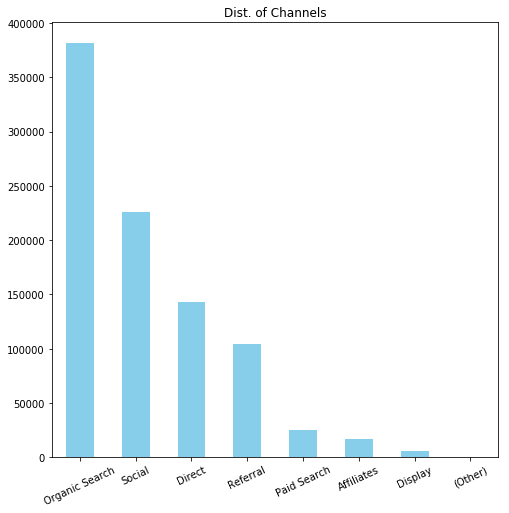

In [24]:
df.channelGrouping.value_counts().plot(kind="bar",title="Dist. of Channels",figsize=(8,8),rot=25,color ='skyblue') 
# rot, rotation ..
#colomap .. to align the color of the columns 

## Date, visitStartTime variables:

In [25]:
"date :{}, visitStartTime :{}".format(df.head(1).date[0], df.head(1).visitStartTime[0])

'date :20160902, visitStartTime :1472830385'

I think the above command is a bit similar to ==> df[date][0] .. 

These variables are strings and have to be converted to a datetime format ..

In [36]:
df["date"] = pd.to_datetime(df["date"], format = "%Y%m%d")
df['date'].head()

0   2016-09-02
1   2016-09-02
2   2016-09-02
3   2016-09-02
4   2016-09-02
Name: date, dtype: datetime64[ns]

In [37]:
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit = 's') 
df['visitStartTime'].head()

0   2016-09-02 15:33:05
1   2016-09-03 05:22:27
2   2016-09-03 01:16:26
3   2016-09-03 05:40:13
4   2016-09-02 13:23:20
Name: visitStartTime, dtype: datetime64[ns]

## Device variable:

This variable is in a form of json format .. we gonna use json libraries to deserialize its values (i.e. extract list of devices from the statements).. 

this will be done using three steps .. 
1. convert device info. to list
2. convert the list to key-value pairs 
3. format the output list 

In [39]:
df['device'].head()

0    {"browser": "Chrome", "browserVersion": "not a...
1    {"browser": "Firefox", "browserVersion": "not ...
2    {"browser": "Chrome", "browserVersion": "not a...
3    {"browser": "UC Browser", "browserVersion": "n...
4    {"browser": "Chrome", "browserVersion": "not a...
Name: device, dtype: object

In [43]:
## step1
list_of_values = df.device.apply(json.loads).tolist()
list_of_values

[{'browser': 'Chrome',
  'browserVersion': 'not available in demo dataset',
  'browserSize': 'not available in demo dataset',
  'operatingSystem': 'Windows',
  'operatingSystemVersion': 'not available in demo dataset',
  'isMobile': False,
  'mobileDeviceBranding': 'not available in demo dataset',
  'mobileDeviceModel': 'not available in demo dataset',
  'mobileInputSelector': 'not available in demo dataset',
  'mobileDeviceInfo': 'not available in demo dataset',
  'mobileDeviceMarketingName': 'not available in demo dataset',
  'flashVersion': 'not available in demo dataset',
  'language': 'not available in demo dataset',
  'screenColors': 'not available in demo dataset',
  'screenResolution': 'not available in demo dataset',
  'deviceCategory': 'desktop'},
 {'browser': 'Firefox',
  'browserVersion': 'not available in demo dataset',
  'browserSize': 'not available in demo dataset',
  'operatingSystem': 'Macintosh',
  'operatingSystemVersion': 'not available in demo dataset',
  'isMobil

In [45]:
## step2
keys = []

for i in list_of_values:
    for j in list(i.keys()):
        if(j not in keys):
            keys.append(j)

keys

['browser',
 'browserVersion',
 'browserSize',
 'operatingSystem',
 'operatingSystemVersion',
 'isMobile',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'deviceCategory']

Viola ! ..

List of devices is extracted !   .. 

Let's add these devices to the df .. to extract more insights from .. i.e. extract all subcategories of some 
categories we are interested in .. i.e. list of browsers !

In [47]:
tmp_devices_df = pd.DataFrame(df.device.apply(json.loads).tolist())[["browser", "operatingSystem", "deviceCategory", "isMobile"]]
tmp_devices_df.head()

,browser,operatingSystem,deviceCategory,isMobile
0,Chrome,Windows,desktop,False
1,Firefox,Macintosh,desktop,False
2,Chrome,Windows,desktop,False
3,UC Browser,Linux,desktop,False
4,Chrome,Android,mobile,True


Let's extract more insights from the above tmp_devices_df .. 

In [48]:
tmp_devices_df.describe()

,browser,operatingSystem,deviceCategory,isMobile
count,903653,903653,903653,903653
unique,54,20,3,2
top,Chrome,Windows,desktop,False
freq,620364,350072,664479,664530


In [49]:
tmp_devices_df.deviceCategory.unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

In [50]:
tmp_devices_df.operatingSystem.unique()

array(['Windows', 'Macintosh', 'Linux', 'Android', 'iOS', 'Chrome OS',
       'BlackBerry', '(not set)', 'Samsung', 'Windows Phone', 'Xbox',
       'Nintendo Wii', 'Firefox OS', 'Nintendo WiiU', 'FreeBSD', 'Nokia',
       'NTT DoCoMo', 'Nintendo 3DS', 'SunOS', 'OpenBSD'], dtype=object)

Let's even extract more insights from the above tmp table visually ..

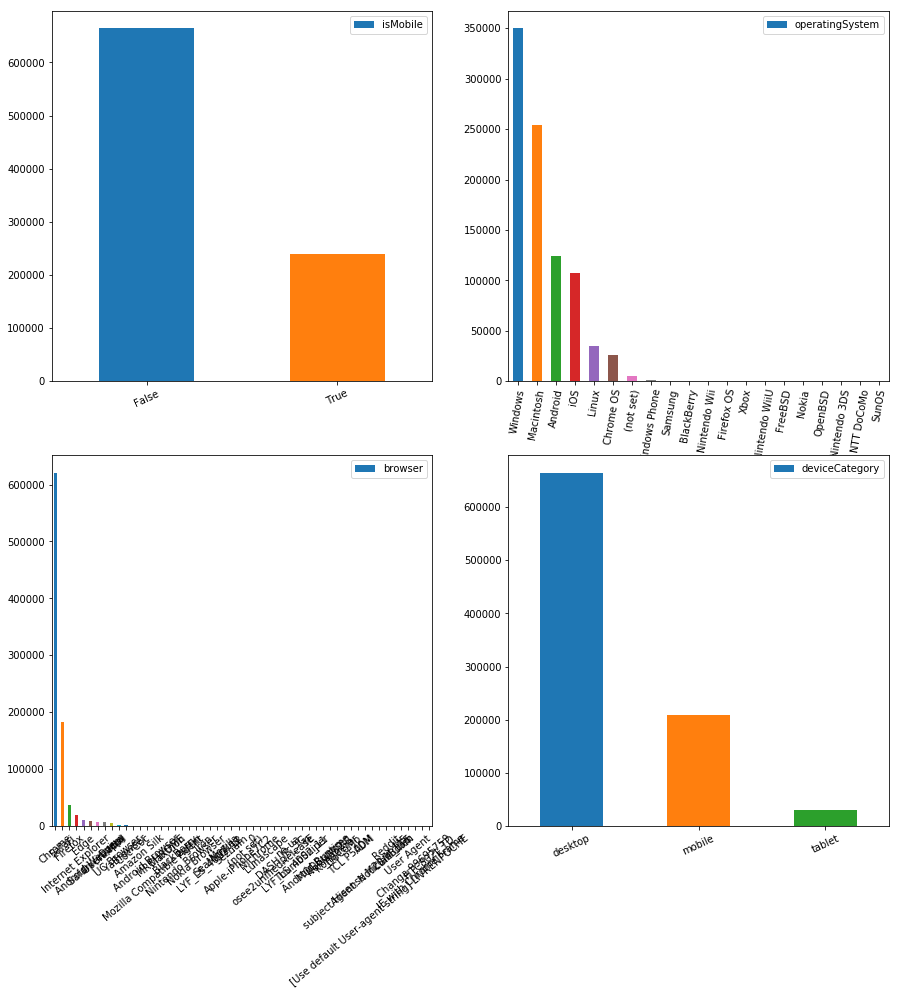

In [57]:
fig, axes = plt.subplots(2,2,figsize=(15,15))

tmp_devices_df['isMobile'].value_counts().plot(kind = "bar", ax = axes[0][0], rot = 25, legend="isMobile")
tmp_devices_df['operatingSystem'].value_counts().plot(kind = "bar", ax = axes[0][1], rot = 80, legend="OS")
tmp_devices_df['browser'].value_counts().plot(kind = "bar", ax = axes[1][0], rot = 40, legend="browser")
tmp_devices_df['deviceCategory'].value_counts().plot(kind = "bar", ax = axes[1][1], rot = 25, legend="deviceCategory")

## Comment:
There are two main comments on the above plot .. 
1. all the values of the variables are plotted .. which makes the bars so small and the xlabel is unclear .. 
2. there are multiple colors in each plot (bad visualization) ..

We gonna solve these issues ..

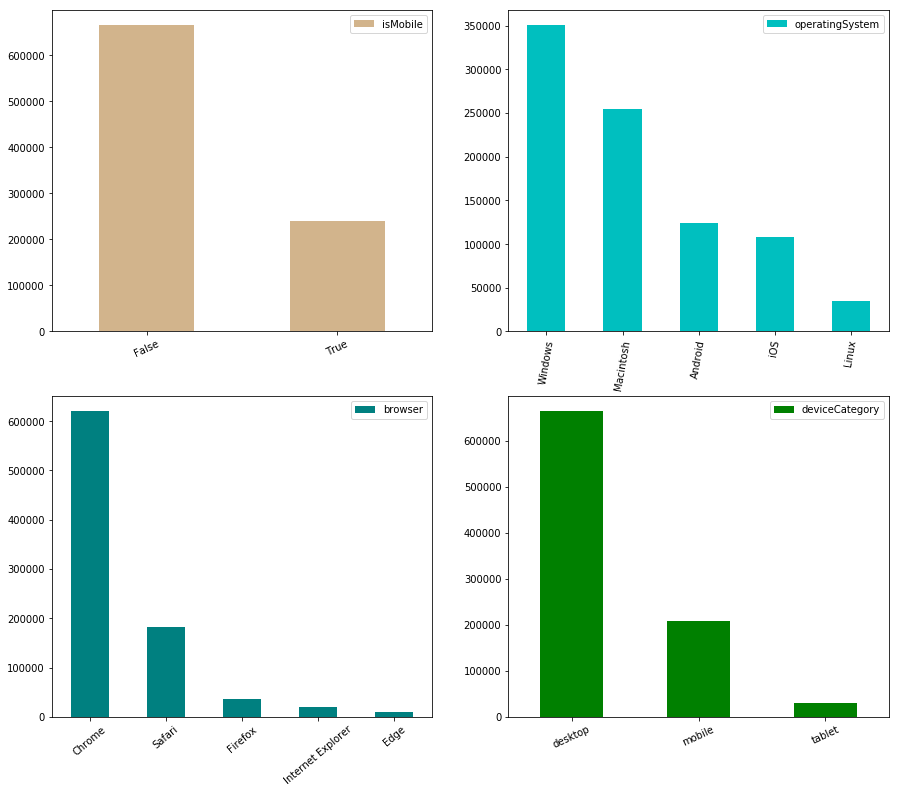

In [62]:
fig, axes = plt.subplots(2,2,figsize=(15,13))

tmp_devices_df['isMobile'].value_counts().plot(kind = "bar", ax = axes[0][0], rot = 25, legend="isMobile",color='tan')
tmp_devices_df['operatingSystem'].value_counts().head(5).plot(kind = "bar", ax = axes[0][1], rot = 80, legend="OS",color='c')
tmp_devices_df['browser'].value_counts().head(5).plot(kind = "bar", ax = axes[1][0], rot = 40, legend="browser",color='teal')
tmp_devices_df['deviceCategory'].value_counts().plot(kind = "bar", ax = axes[1][1], rot = 25, legend="deviceCategory",color='green')

## GeoNetwork variable:

In [63]:
df['geoNetwork'].head()

0    {"continent": "Asia", "subContinent": "Western...
1    {"continent": "Oceania", "subContinent": "Aust...
2    {"continent": "Europe", "subContinent": "South...
3    {"continent": "Asia", "subContinent": "Southea...
4    {"continent": "Europe", "subContinent": "North...
Name: geoNetwork, dtype: object

the same applied on geoNetwork variable .. it is a statement that we gonna extract places from ..

In [65]:
## step1
list_of_values = df.geoNetwork.apply(json.loads).tolist()
list_of_values

[{'continent': 'Asia',
  'subContinent': 'Western Asia',
  'country': 'Turkey',
  'region': 'Izmir',
  'metro': '(not set)',
  'city': 'Izmir',
  'cityId': 'not available in demo dataset',
  'networkDomain': 'ttnet.com.tr',
  'latitude': 'not available in demo dataset',
  'longitude': 'not available in demo dataset',
  'networkLocation': 'not available in demo dataset'},
 {'continent': 'Oceania',
  'subContinent': 'Australasia',
  'country': 'Australia',
  'region': 'not available in demo dataset',
  'metro': 'not available in demo dataset',
  'city': 'not available in demo dataset',
  'cityId': 'not available in demo dataset',
  'networkDomain': 'dodo.net.au',
  'latitude': 'not available in demo dataset',
  'longitude': 'not available in demo dataset',
  'networkLocation': 'not available in demo dataset'},
 {'continent': 'Europe',
  'subContinent': 'Southern Europe',
  'country': 'Spain',
  'region': 'Community of Madrid',
  'metro': '(not set)',
  'city': 'Madrid',
  'cityId': 'not 

In [66]:
## step2
keys = []

for i in list_of_values:
    for j in list(i.keys()):
        if(j not in keys):
            keys.append(j)

keys

['continent',
 'subContinent',
 'country',
 'region',
 'metro',
 'city',
 'cityId',
 'networkDomain',
 'latitude',
 'longitude',
 'networkLocation']

In [68]:
tmp_geoNetwork_df = pd.DataFrame(df.geoNetwork.apply(json.loads).tolist())[["continent", "subContinent", "country", "city"]]
tmp_geoNetwork_df.head()

,continent,subContinent,country,city
0,Asia,Western Asia,Turkey,Izmir
1,Oceania,Australasia,Australia,not available in demo dataset
2,Europe,Southern Europe,Spain,Madrid
3,Asia,Southeast Asia,Indonesia,not available in demo dataset
4,Europe,Northern Europe,United Kingdom,not available in demo dataset


In [69]:
tmp_geoNetwork_df.describe()

,continent,subContinent,country,city
count,903653,903653,903653,903653
unique,6,23,222,649
top,Americas,Northern America,United States,not available in demo dataset
freq,450377,390657,364744,508229


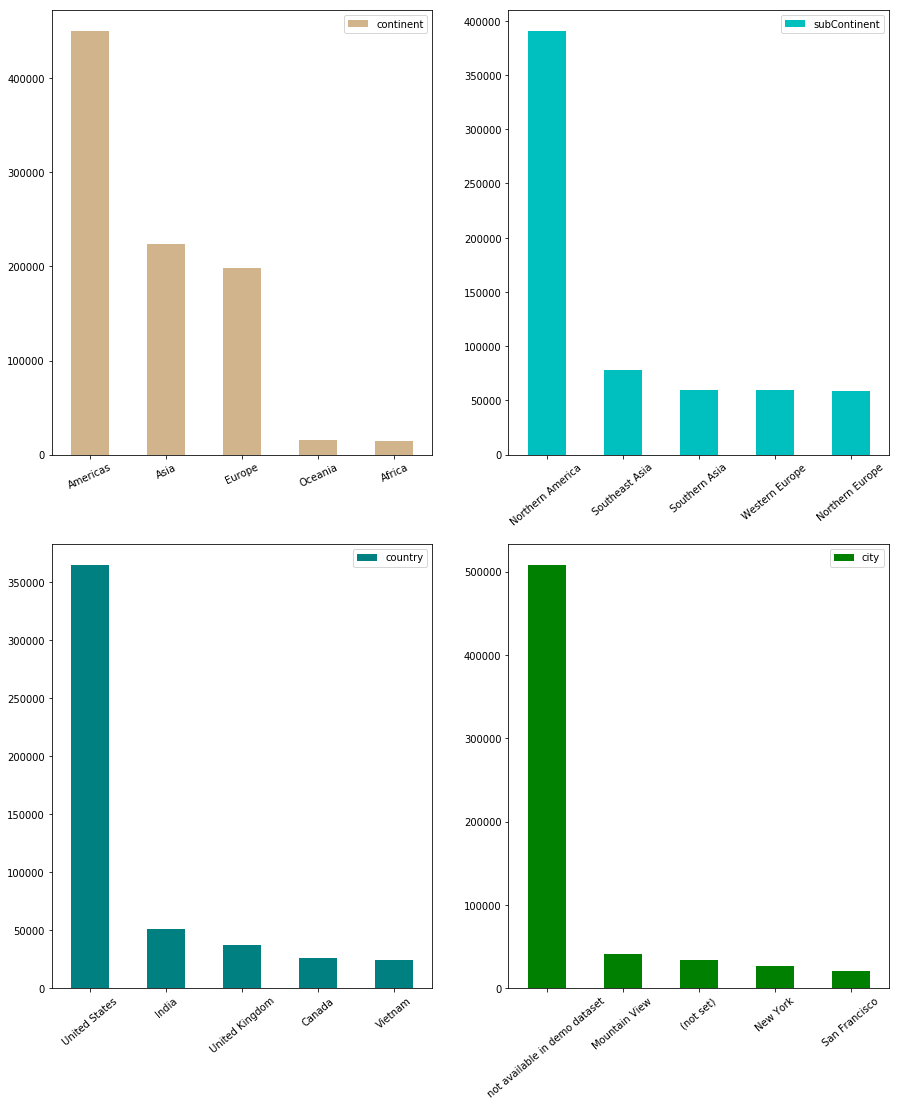

In [75]:
fig, axes = plt.subplots(2,2,figsize=(15,18))

tmp_geoNetwork_df['continent'].value_counts().head(5).plot(kind = "bar", ax = axes[0][0], rot = 25, legend="Continent",color='tan')
tmp_geoNetwork_df['subContinent'].value_counts().head(5).plot(kind = "bar", ax = axes[0][1], rot = 40, legend="subContinent",color='c')
tmp_geoNetwork_df['country'].value_counts().head(5).plot(kind = "bar", ax = axes[1][0], rot = 40, legend="country",color='teal')
tmp_geoNetwork_df['city'].value_counts().head(5).plot(kind = "bar", ax = axes[1][1], rot = 40, legend="city",color='green')

Perfect !

Let's explore the contents in more details .. 

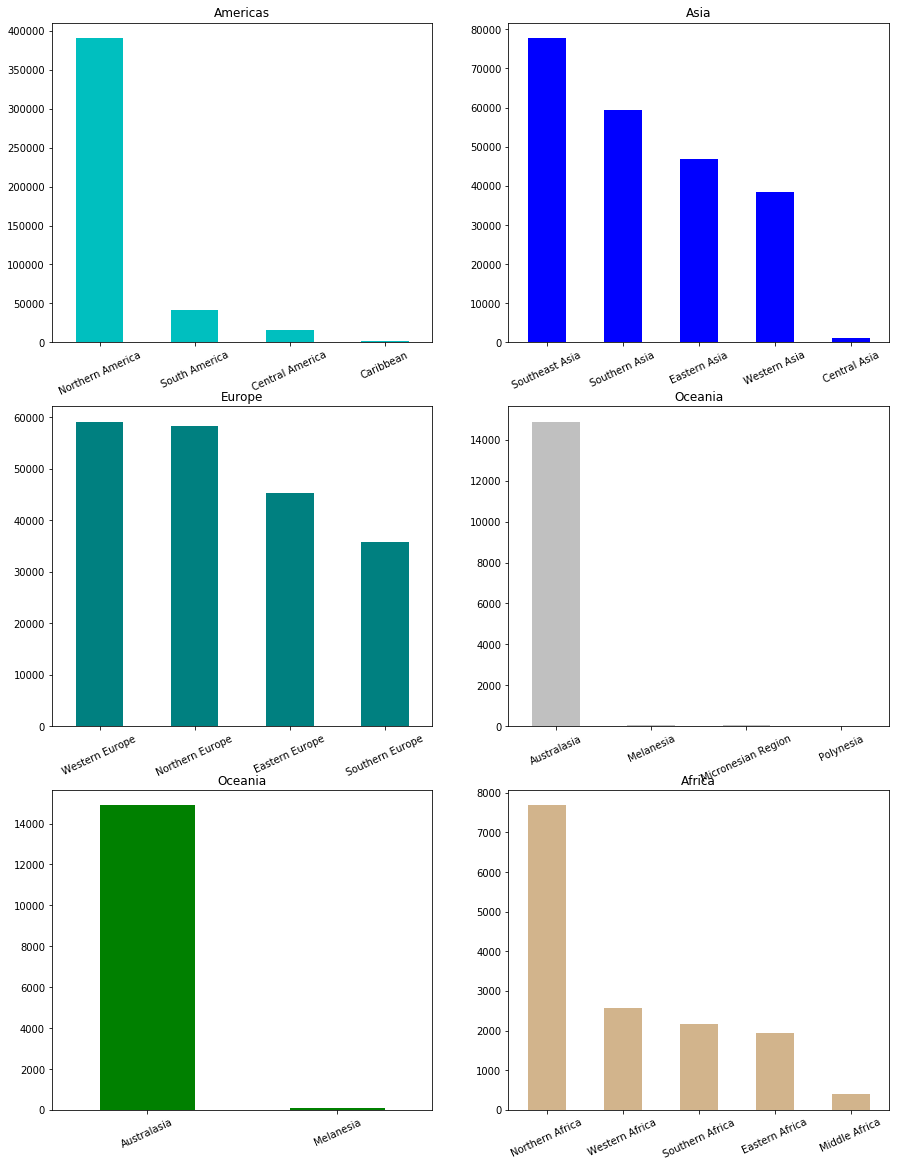

In [89]:
## explore subcontents in the top 5 subcontents .. 

fig, axes = plt.subplots(3,2, figsize=(15,20))

tmp_geoNetwork_df[tmp_geoNetwork_df['continent'] == 'Americas']['subContinent'].value_counts().plot(kind = "bar", rot = 25, ax = axes[0][0], color = "c", title = "Americas")

tmp_geoNetwork_df[tmp_geoNetwork_df['continent'] == 'Asia']['subContinent'].value_counts().plot(kind = "bar", rot = 25, ax = axes[0][1], color = "blue", title = "Asia")

tmp_geoNetwork_df[tmp_geoNetwork_df['continent'] == 'Europe']['subContinent'].value_counts().plot(kind = "bar", rot = 25, ax = axes[1][0], color = "teal",  title="Europe")

tmp_geoNetwork_df[tmp_geoNetwork_df['continent'] == 'Oceania']['subContinent'].value_counts().plot(kind = "bar", rot = 25, ax = axes[1][1], color = "silver", title = "Oceania")

tmp_geoNetwork_df[tmp_geoNetwork_df['continent'] == 'Oceania']['subContinent'].value_counts().head(2).plot(kind = "bar", rot = 25, ax = axes[2][0], color = "green", title = "Oceania")

tmp_geoNetwork_df[tmp_geoNetwork_df['continent'] == 'Africa']['subContinent'].value_counts().plot(kind = "bar", rot = 25, ax = axes[2][1], color = "tan", title = "Africa")


There is a huge gap between the top two subcontanents in Oceania .. Australasia have far more higher engagements ..

## socialEngagementType variable:

In [90]:
df['socialEngagementType'].head()

0    Not Socially Engaged
1    Not Socially Engaged
2    Not Socially Engaged
3    Not Socially Engaged
4    Not Socially Engaged
Name: socialEngagementType, dtype: object

In [91]:
df['socialEngagementType'].describe()

count                   903653
unique                       1
top       Not Socially Engaged
freq                    903653
Name: socialEngagementType, dtype: object

mmm ! .. 
a bit strange ! .. 

the type of all social engagement types is (Not socially Engaged)

## totals variable:

this variable contains aggregate values

In [92]:
df['totals'].head()

0    {"visits": "1", "hits": "1", "pageviews": "1",...
1    {"visits": "1", "hits": "1", "pageviews": "1",...
2    {"visits": "1", "hits": "1", "pageviews": "1",...
3    {"visits": "1", "hits": "1", "pageviews": "1",...
4    {"visits": "1", "hits": "1", "pageviews": "1",...
Name: totals, dtype: object

In [93]:
## step1
list_of_values = df.totals.apply(json.loads).tolist()
list_of_values

[{'visits': '1',
  'hits': '1',
  'pageviews': '1',
  'bounces': '1',
  'newVisits': '1'},
 {'visits': '1',
  'hits': '1',
  'pageviews': '1',
  'bounces': '1',
  'newVisits': '1'},
 {'visits': '1',
  'hits': '1',
  'pageviews': '1',
  'bounces': '1',
  'newVisits': '1'},
 {'visits': '1',
  'hits': '1',
  'pageviews': '1',
  'bounces': '1',
  'newVisits': '1'},
 {'visits': '1', 'hits': '1', 'pageviews': '1', 'bounces': '1'},
 {'visits': '1',
  'hits': '1',
  'pageviews': '1',
  'bounces': '1',
  'newVisits': '1'},
 {'visits': '1',
  'hits': '1',
  'pageviews': '1',
  'bounces': '1',
  'newVisits': '1'},
 {'visits': '1',
  'hits': '1',
  'pageviews': '1',
  'bounces': '1',
  'newVisits': '1'},
 {'visits': '1',
  'hits': '1',
  'pageviews': '1',
  'bounces': '1',
  'newVisits': '1'},
 {'visits': '1',
  'hits': '1',
  'pageviews': '1',
  'bounces': '1',
  'newVisits': '1'},
 {'visits': '1',
  'hits': '1',
  'pageviews': '1',
  'bounces': '1',
  'newVisits': '1'},
 {'visits': '1',
  'hits'

In [94]:
## step2
keys = []

for i in list_of_values:
    for j in list(i.keys()):
        if(j not in keys):
            keys.append(j)

keys

['visits', 'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue']

In [96]:
tmp_totals_df = pd.DataFrame(df.totals.apply(json.loads).tolist())[["visits", "hits", "pageviews", "transactionRevenue"]]
tmp_totals_df.head()

,visits,hits,pageviews,transactionRevenue
0,1,1,1,NaN
1,1,1,1,NaN
2,1,1,1,NaN
3,1,1,1,NaN
4,1,1,1,NaN


In [97]:
tmp_totals_df.describe()

,visits,hits,pageviews,transactionRevenue
count,903653,903653,903553,11515
unique,1,274,213,5332
top,1,1,1,16990000
freq,903653,446754,452522,256


mmmm it seems that this variable need a lot of cleaning to be able to use it in the modeling phase .. 

as transactionRevenue variable key (i.e. column) contains lots of NAs .. besides, the other three variables, visits, hits and pageviews contains almost no values rather than 1 .. and how come this indicates totals ! :S  .. 

Let's make a derived variable from the transactionRevenue .. 

In [101]:
## step1: create column named revenue in df .. 
df["revenue"] = pd.DataFrame(df.totals.apply(json.loads).tolist())["transactionRevenue"]
df["revenue"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: revenue, dtype: object

In [114]:
## step2: calc revenue per each unique date ..
revenue_datetime_df = df[["revenue", "date"]].dropna()
revenue_datetime_df["revenue"] = revenue_datetime_df.revenue.astype(np.int64)
revenue_datetime_df.head()

,revenue,date
752,37860000,2016-09-02
753,306670000,2016-09-02
799,68030000,2016-09-02
802,26250000,2016-09-02
859,574150000,2016-09-02


Awesome ! .. 

Let's aggregate on days .. and plot daily revenue ..

In [115]:
daily_rev = revenue_datetime_df.groupby(by = ["date"], axis = 0).sum()
daily_rev.head()

,revenue
date,
2016-08-01,6116060000
2016-08-02,1361190000
2016-08-04,1182890000
2016-08-05,5594260000
2016-08-06,1891040000


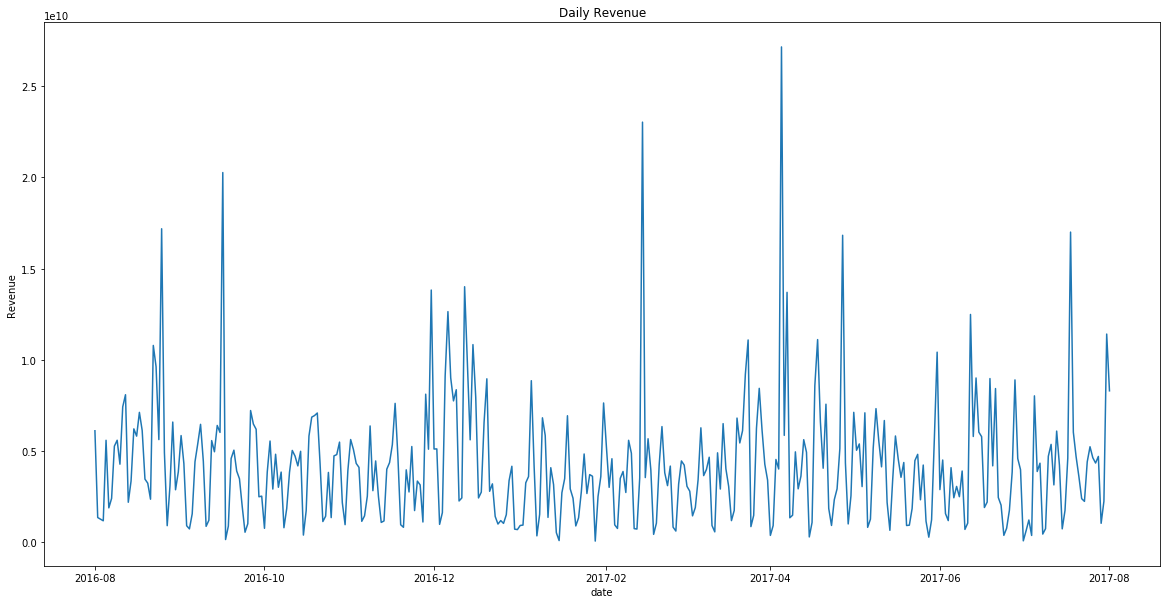

In [117]:
fig, axes = plt.subplots(figsize=(20,10))
axes.set_title("Daily Revenue")
axes.set_ylabel("Revenue")
axes.set_xlabel("date")
axes.plot(daily_rev["revenue"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x278b73d14a8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x278b73d10f0>,
 'cmins': <matplotlib.collections.LineCollection at 0x278b73de400>,
 'cbars': <matplotlib.collections.LineCollection at 0x278b73def60>,
 'cmedians': <matplotlib.collections.LineCollection at 0x278b73decf8>}

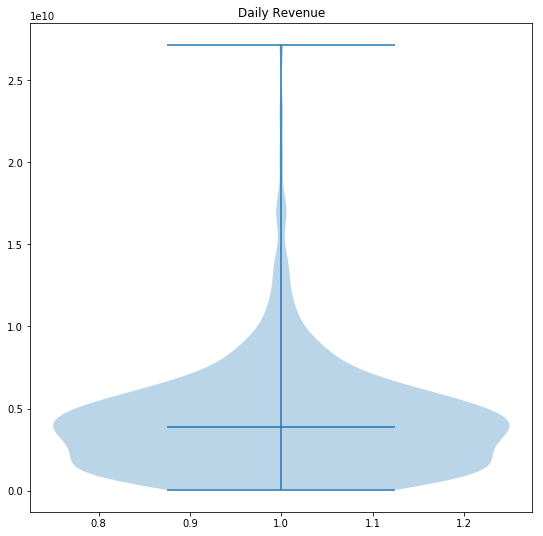

In [124]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(9,9))
axes.set_title("Daily Revenue")
axes.violinplot(list(daily_rev["revenue"].values), showmeans=False, showmedians=True)

mmm the revenue is speading a lot ! ..

## VisitNumber variable:

In [125]:
df['visitNumber'].head()

0    1
1    1
2    1
3    1
4    2
Name: visitNumber, dtype: int64

there is no enough information to tell the visit number of each customer .. 

however we can chech the visit number per day ! (i.e. visitNumber vs date)

In [127]:
visit_date_df = df[["date", "visitNumber"]]
visit_date_df["visitNumber"] = visit_date_df.visitNumber.astype(np.int64)
visit_date_df["visitNumber"].head()

0    1
1    1
2    1
3    1
4    2
Name: visitNumber, dtype: int64

In [128]:
daily_visit = visit_date_df.groupby(by = ["date"], axis = 0).sum()
daily_visit.head()

,visitNumber
date,
2016-08-01,6320
2016-08-02,6929
2016-08-03,7233
2016-08-04,6456
2016-08-05,5686


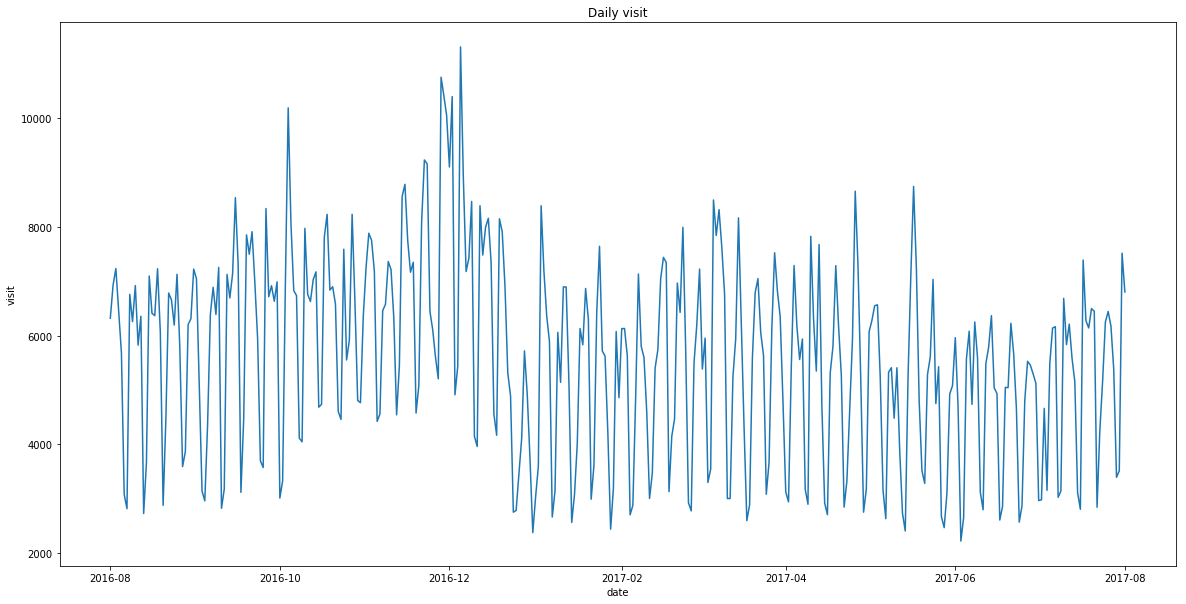

In [130]:
fig, axes = plt.subplots(figsize=(20,10))
axes.set_title("Daily visit")
axes.set_ylabel("visit")
axes.set_xlabel("date")
axes.plot(daily_visit["visitNumber"])

intresting ! .. 

the last two months of 2016 contains a login peak .. and the overall login rate is almost the same in 2017

{'bodies': [<matplotlib.collections.PolyCollection at 0x278b741f048>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x278b741f518>,
 'cmins': <matplotlib.collections.LineCollection at 0x278b7425ba8>,
 'cbars': <matplotlib.collections.LineCollection at 0x278b7425208>,
 'cmedians': <matplotlib.collections.LineCollection at 0x278b74259e8>}

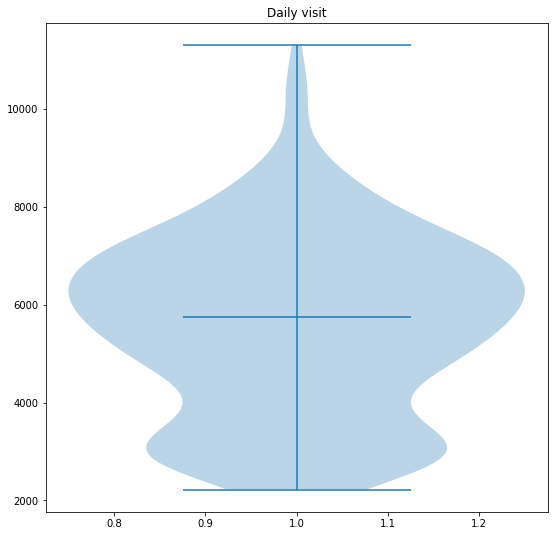

In [133]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(9,9))
axes.set_title("Daily visit")
axes.violinplot(list(daily_visit["visitNumber"].values), showmeans=False, showmedians=True)

The violin plot confirms the same info of line chart that is there was a peak in visting rate and decreased in 2017